In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# Import the dataset
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Remove rows where page views were in the top 2.5% or the bottom 2.5%
bottom = df['value'].quantile(0.025)
top = df['value'].quantile(0.975)
filtered_data = df[(df['value'] > bottom) & (df['value'] < top)]

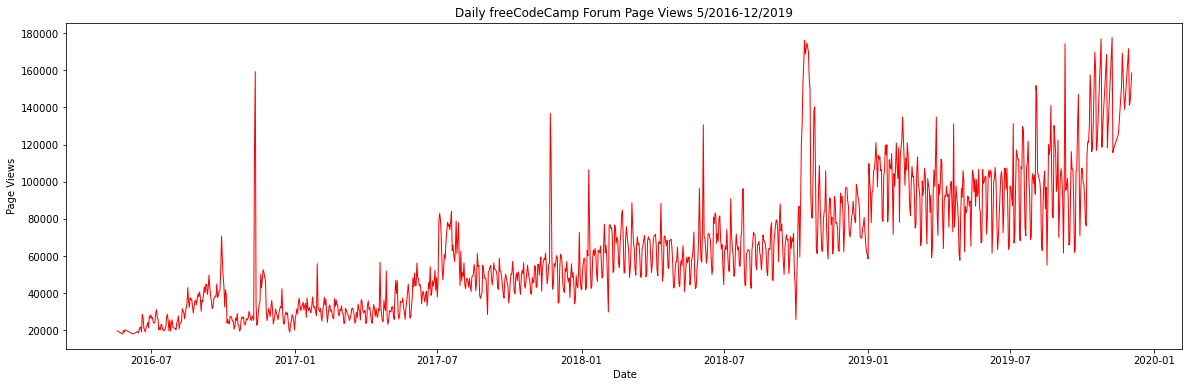

In [4]:
# To draw a line plot
def draw_line_plot():
     # Convert the index (date) to a datetime object
    filtered_data.index = pd.to_datetime(filtered_data.index)

    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(filtered_data.index, filtered_data['value'], color='r', linewidth=1)
    ax.set(xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.grid(False)

    # Rotate x-axis tick labels for better readability
    plt.xticks(rotation=0)

    # Show the plot
    plt.show()
    fig.savefig('lineplot.png', facecolor='white')
    return fig

# Call the function to draw the line chart
figure = draw_line_plot()




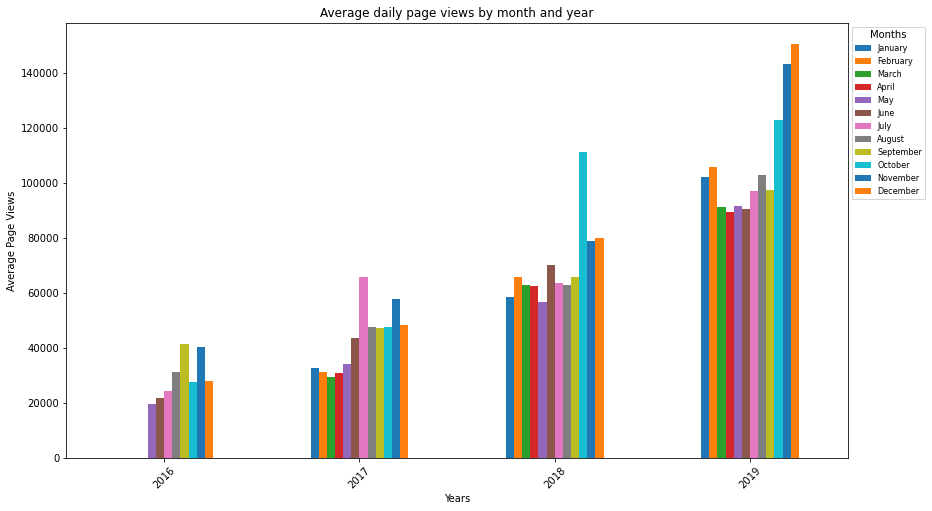

In [5]:
# Draw a bar chart of average views by month
def draw_bar_plot():
    # Convert the index (date) to a datetime object
    filtered_data.index = pd.to_datetime(filtered_data.index)
    filtered_data_copy = filtered_data.copy()

    # Group the data by year and month, and calculate the average page views
    grouped_data = filtered_data_copy.groupby([filtered_data_copy.index.year, filtered_data_copy.index.month]).mean()
    
    # Reshape the dataframe to have year as rows and month as columns
    pivoted_data = grouped_data.unstack()

    # Map the month numbers to their respective names
    pivoted_data.columns = calendar.month_name[1:]
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(14, 8))
    pivoted_data.plot(kind='bar', ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_title('Average daily page views by month and year')
    
    # Set the legend title and position
    ax.legend(title="Months", bbox_to_anchor=(1, 1), prop={'size': 8})

    # Rotate the x-axis tick labels
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()
    fig.savefig('barplot.png', facecolor='white')

    return fig

figure = draw_bar_plot()


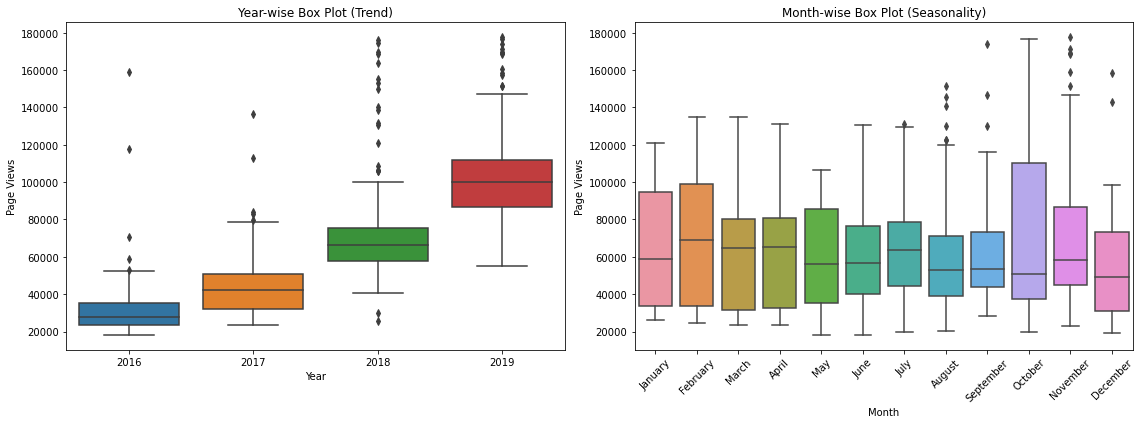

In [6]:
# To draw a boxplot
def draw_box_plot():
    # Convert the index (date) to a datetime object
    filtered_data.index = pd.to_datetime(filtered_data.index)
    
    # Create a copy of the dataframe with the year and month as separate columns
    filtered_data_copy = filtered_data.copy()
    filtered_data_copy['Year'] = filtered_data_copy.index.year
    filtered_data_copy['Month'] = filtered_data_copy.index.month_name()
    
    # Plot the year-wise box plot
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    sns.boxplot(x='Year', y='value', data=filtered_data_copy, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")
    
    # Plot the month-wise box plot
    month_order = list(calendar.month_name)[1:]
    sns.boxplot(x='Month', y='value', data=filtered_data_copy, ax=axes[1], order=month_order)
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")
    axes[1].set_xticklabels(month_order, rotation=45)
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plots
    plt.show()
    fig.savefig('boxplot.png', facecolor='white')
    

# Call the function to draw the box plots
draw_box_plot()
